# Visual Pipelines for Text Analysis 

June 25, 2017 &middot; Data Intelligence Conference &middot; Capitol One

## Visual Sentiment Analysis 

In [1]:
# Imports

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.classifier import ClassificationReport

In [2]:
# Load the Amazon reviews of patio, lawn, and garden equipment
# Reviews include both text and rating on a 1-5 scale
# Source: http://jmcauley.ucsd.edu/data/amazon/

def get_reviews(path):
    my_file = open(path, 'r')
    for review in my_file:
        content = eval(review)
        yield (content["reviewText"],content["overall"])

texts, ratings = zip(*list(get_reviews('fixtures/reviews_Patio_Lawn_and_Garden_5.json')))

In [3]:
# We'd like to use the text of the reviews to predict the numeric rating
# Use term frequency-inverse document frequency to encode the texts

X = list(texts)
tfidf     = TfidfVectorizer()
X_encoded = tfidf.fit_transform(X)

In [4]:
# Our target is the numeric ratings, which are provided on a 1-5 scale
# We'll map the rating scale to a binary one, where a rating of 5 is
# "positive" and a rating below 5 is "negative"

y = list(ratings)
y_mapped  = []
for value in y:
    if value >= 5.0:
        y_mapped.append(1)
    else:
        y_mapped.append(0)

In [6]:
# Create training and test splits for cross validation

splits = train_test_split(X_encoded, y_mapped, test_size=0.2)
X_train, X_test, y_train, y_test = splits

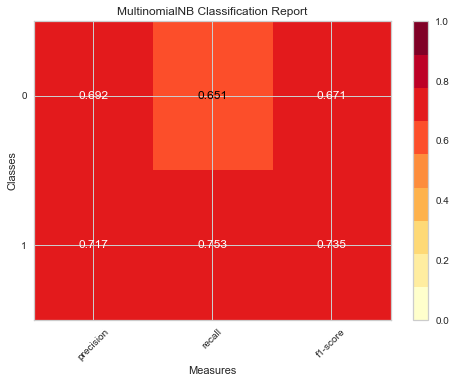

In [7]:
# Train a Multinomial Naive Bayes model and use Yellowbrick to visualize
# the fitted model's success at predicting "positive" (5-star) ratings

visualizer = ClassificationReport(MultinomialNB())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()